In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA(8:2)

In [3]:
data = pd.read_csv('BacNinh.csv')

# Chuyển đổi cột 'date' thành định dạng thời gian
data['date'] = pd.to_datetime(data['date'])
data = data.loc[(data['date'] >= '2019-01-03') & (data['date'] <= '2024-01-03')]
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,20-06-2020,66,21,35,9,3,3,66
1,2,21-06-2020,25,18,32,9,3,2,25
2,3,22-06-2020,22,24,95,9,5,2,24
3,4,23-06-2020,25,30,34,9,6,3,30
4,5,24-06-2020,32,38,21,9,5,4,38
...,...,...,...,...,...,...,...,...,...
1112,1113,25-12-2023,162,125,2,26,21,7,162
1113,1114,26-12-2023,204,66,18,11,11,4,204
1114,1115,01-01-2024,97,46,14,11,13,2,97
1115,1116,02-01-2024,66,55,8,13,25,3,66


In [4]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8286.533, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8429.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8430.862, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8430.717, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8427.037, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8286.216, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8351.512, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8323.468, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8286.263, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8292.162, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8285.102, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8384.691, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8286.584, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8366.996, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[66.32562147 66.58304757 66.71390729 66.75992347 66.76710475 66.76251483
 66.75728388 66.75417257 66.75288    66.75255234 66.75258171 66.75267803
 66.75274762 66.75278115 66.75279213 66.75279333 66.75279183 66.75279037
 66.75278956 66.75278924 66.75278917 66.75278918 66.75278921 66.75278923
 66.75278924 66.75278924 66.75278924 66.75278924 66.75278924 66.75278924]


In [7]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 53.168878108503364
MAE: 39.027502197243926
MAPE: 374.90598869368205


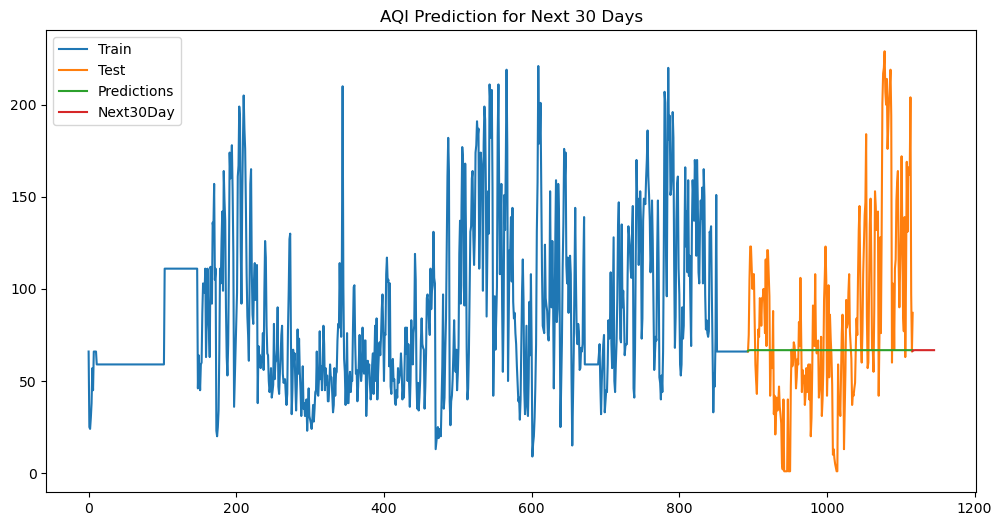

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

ARIMA(7:3)

In [9]:
train_size = int(0.7*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7355.615, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7356.870, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7356.286, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7353.650, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7268.459, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7231.519, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7317.960, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7233.059, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7232.123, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7308.199, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7231.872, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7229.717, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7266.808, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[186.65276239 150.51844484 125.96799907 114.5572867  111.0855667
 110.9601699  111.67828177 112.29130823 112.61973251 112.74176024
 112.76332744 112.75202731 112.73775288 112.72882502 112.72494333
 112.72389843 112.72396636 112.72426834 112.72449763 112.72461258
 112.72465182 112.72465654 112.72465111 112.72464559 112.72464238
 112.72464108 112.72464078 112.72464085 112.72464097 112.72464105]


In [11]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 54.41912527803232
MAE: 46.885915709673405
MAPE: 447.1208668287973


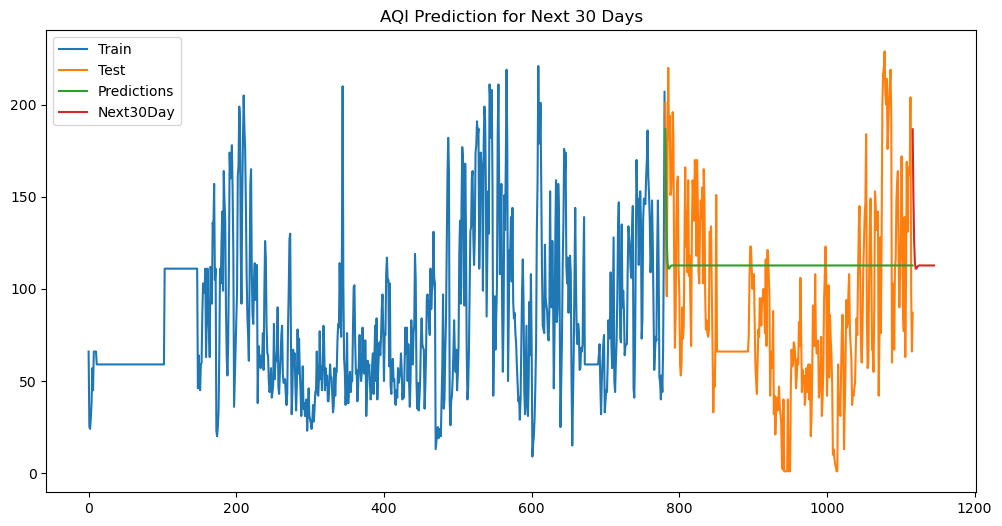

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

ARIMA(9:1)

In [13]:
train_size = int(0.9*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9303.183, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9452.591, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9454.491, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9454.417, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9450.592, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9302.332, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9370.358, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9333.029, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9303.111, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9312.072, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9301.448, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9409.889, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9303.209, Time=0.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9389.737, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[87.26903824 81.64865682 77.0649155  74.61848299 73.62025057 73.32476278
 73.29049316 73.3214034  73.35190978 73.36945245 73.37706904 73.37954177
 73.37997159 73.37982332 73.37962546 73.37950154 73.37944432 73.37942422
 73.37941981 73.37942031 73.37942155 73.37942241 73.37942283 73.37942299
 73.37942303 73.37942304 73.37942303 73.37942302 73.37942302 73.37942302]


In [15]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 64.71563521195993
MAE: 49.956996105215765
MAPE: 221.19688619993886


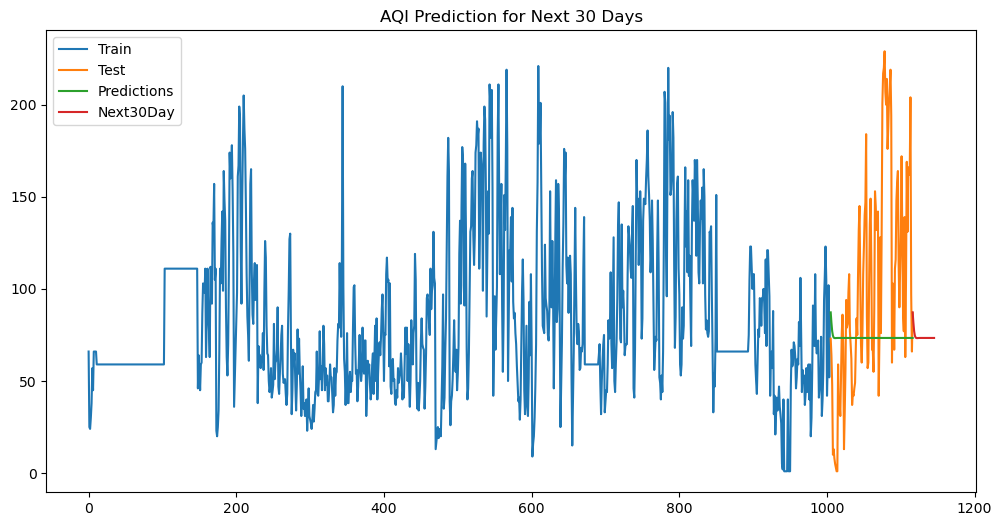

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()